# Historical Simple Algorithms

In [1]:
# all modules used in this notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

# personal color pallete
c_ = {
    'red': '#ff6188',
    'orange': '#fc9867',
    'yellow': '#ffd866',
    'green': '#a8dd76',
    'blue': '#78dce8',
    'purple': '#ac9df2',
    'grey': '#2c2a2e',
    'white': '#fcfcfa',
    'black': '#211f22' 
}

# global params
matplotlib.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.facecolor'] = c_['black']
plt.rcParams['axes.facecolor'] = c_['black']
plt.rcParams['text.color'] = c_['white']
plt.rcParams['axes.labelcolor'] = c_['white']
plt.rcParams['xtick.color'] = c_['white']
plt.rcParams['ytick.color'] = c_['white']


## Data Generation


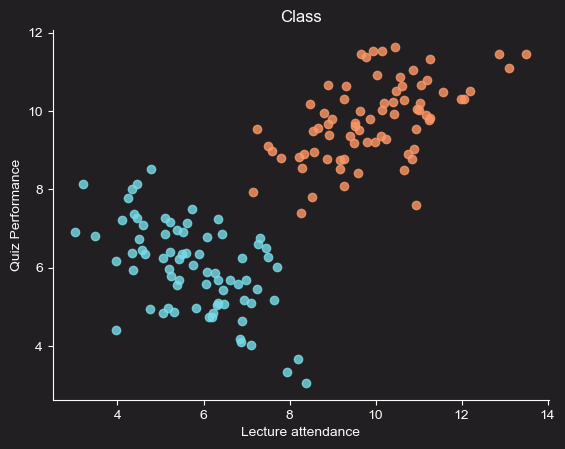

In [34]:
SEED = 819
np.random.seed(SEED)

n_samples = 150
mean = [0, 0]    
cov = [[2, 0],    
       [0, 0.5]]
angle = 45 

data = np.random.multivariate_normal(mean, cov, int(n_samples/2))

theta = np.radians(angle)
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])
theta += 5

rotation_matrix1 = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])

rotated_data = data @ rotation_matrix
rotated_data1 = data @ rotation_matrix1
X = np.vstack([rotated_data + 6, rotated_data1 + 10])
y = np.vstack([np.zeros(int(n_samples/2)), np.ones(int(n_samples/2))]).flatten()

# Scatter plot
fig, ax = plt.subplots()
group = X[y == 0]
group1 = X[y == 1]
ax.scatter(group[:, 0], group[:, 1], alpha=0.8, c=c_['blue'])
ax.scatter(group1[:, 0], group1[:, 1], alpha=0.8, c=c_['orange'])
ax.set_title('Class')
ax.set_xlabel('Lecture attendance')
ax.set_ylabel('Quiz Performance')

ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_color(c_['white'])
plt.show()

## Rosenblatt's Perceptron

This learning algorithm involves mimicking simplfied neurons where it fires (value of $1$) when a threshold of values are met, hence:
$$
\sigma(z) =
\begin{cases} 
1 & \text{if } z \ge 0 \\ 
0 & \text{otherwise}
\end{cases}
$$
where
$$z = \vec{w}^T\vec{x} + b$$
The **bias unit** $b$ is $ -\theta$


### Perceptron learning rule
$$\vec{w} = \text{small random numbers}, \ b = 0 \tag{1}$$
For each training example, $x^{(i)}$, compute $\hat{y}^{(i)}$:

$$\hat{y}^{(i)} = \sigma(z^{(i)}) \tag{2}$$
then update weights and bias:
$$w_j \coloneqq w_j + \eta(y^{(i)} - \hat{y}^{(i)})x_j^{(i)}\tag{3}$$
$$b \coloneqq b + \eta(y^{(i)} - \hat{y}^{(i)})$$

Repeat steps $(2)$ & $(3)$ until max epochs and/or max misclassifications is met.



### Implementation of `Perceptron()` Class

In [3]:
class Perceptron():
    
    def __init__(self, eta, n_epochs):
        self._w = None
        self._b = None
        self._eta = eta
        self._n_epochs = n_epochs
        
    def _net_input(self, X):
        return X @ self._w + self._b
    
    def predict(self, X):
        return np.where(self._net_input(X) >= 0, 1, 0)
    
    def fit(self, X, y):
        m = X.shape[0]
        n = X.shape[1]
        
        self._w = np.random.rand(n)
        self._b = 0
    
        for i in range(self._n_epochs):
            # predict & calc error
            y_pred = self.predict(X)
            error = (y - y_pred).rehshape(-1, 1)
            # update
            self._w = self._w + self._eta * error * X
            self._b = self._b = self._eta * error

In [4]:
a = np.array([0.5, 2])
b = np.array([[2, 2], [3, 3]])
print(a)
print(b)

a.reshape(-1, 1) * b

[0.5 2. ]
[[2 2]
 [3 3]]


array([[1., 1.],
       [6., 6.]])